El EDA (Exploratory Data Analysis o Análisis Exploratorio de Datos), tiene como objetivo comprender las principales características del conjunto de datos antes de aplicar los modelos predictivos o realizar análisis estadísticos más profundos. El EDA permite descubrir patrones, detectar anomalías, verificar supuestos y probar hipótesis.

# **1. Carga del dataset Mapa_de_Conectividad**

In [3]:
import pandas as pd

Mapa_de_Conectividad_df = pd.read_excel('/content/Mapa_de_Conectividad_final.xlsx')

# **2. Estadísticas descriptivas**

In [6]:
# Obtener un resumen estadístico del dataset
Mapa_de_Conectividad_df.describe()

,Población,ADSL,Cablemódem,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Latitud,Longitud
count,4.305000e+03,4305.000000,4305.000000,4305.000000,4305.000000,4305.000000,4305.000000,4305.000000,4305.000000,4305.000000,4305.000000
mean,8.707207e+03,0.261324,0.201858,0.366318,0.236934,0.524739,0.499884,0.452033,0.517538,-32.263116,-63.039292
std,3.824490e+04,0.439407,0.401434,0.481854,0.425251,0.499446,0.500058,0.497752,0.499750,5.001839,3.829679
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.874009,-72.891627
25%,1.170000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.708542,-65.686443
50%,5.790000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-32.286202,-63.450636
75%,3.217000e+03,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-28.583403,-60.009923
max,1.317298e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-21.817293,-34.626560


**Población**

La población promedio por localidad es de $8.707$ personas, aunque existe una alta variabilidad, como lo muestra la desviación estándar de $38.244$ personas. Esto significa que, mientras algunas localidades tienen una población pequeña, otras pueden ser considerablemente más grandes.

La población mínima es $0$, lo que podría indicar localidades sin habitantes registrados en el dataset, mientras que la población máxima llega a $1.317.298$ personas, lo cual probablemente corresponde a grandes ciudades o centros urbanos.

**Tecnologías de Conectividad (ADSL, Cablemódem, Fibra Óptica, Satelital, Wireless, 3G, 4G)**

En promedio, las localidades tienen baja penetración de tecnologías de conectividad. Por ejemplo, en el caso de ADSL, solo el 26% de las localidades tienen acceso a esta tecnología. Esto es consistente con otras tecnologías como Cablemódem y Fibra Óptica, que también tienen una baja presencia (20% y 36% respectivamente).

Tecnologías más recientes como Fibra Óptica muestran una penetración moderada, lo que sugiere que esta infraestructura está en expansión, pero no ha llegado a todas las áreas.

La conectividad móvil (3G y 4G) muestra una presencia más estable en comparación con otras tecnologías, con 45% de las localidades teniendo acceso a 3G y 52% acceso a 4G. Este es un buen indicador de que la conectividad móvil ha avanzado más rápidamente que las tecnologías fijas en muchas localidades.

**Telefonía Fija**

La penetración de la telefonía fija es de $49,9\%$, lo que indica que aproximadamente la mitad de las localidades en el dataset todavía cuentan con este servicio, aunque se puede esperar que su relevancia esté disminuyendo frente a tecnologías móviles más avanzadas como 4G y 5G.

**Distribución Geográfica (Latitud y Longitud)**

Las localidades cubiertas en el dataset abarcan un rango geográfico amplio, con latitudes que van desde $-77.87$ hasta $-21.82$, lo que cubre gran parte del territorio argentino de sur a norte.

Esta variabilidad geográfica probablemente también afecta la disponibilidad de tecnologías de conectividad, ya que es probable que las áreas más rurales o remotas tengan menos acceso a tecnologías avanzadas como fibra óptica o 4G, en comparación con áreas más urbanas o céntricas.

# **3. Análisis de la distribución de tecnologías**

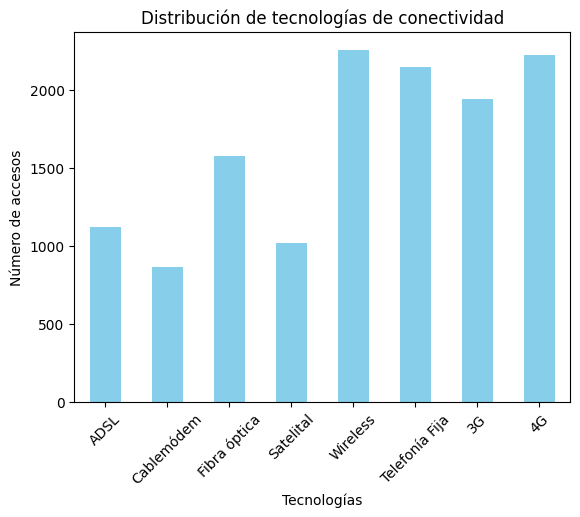

In [7]:
# Sumamos los accesos por cada tecnología en el dataset
tecnologias = ['ADSL', 'Cablemódem', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']
distribucion_tecnologias = Mapa_de_Conectividad_df[tecnologias].sum()

# Graficamos la distribución de tecnologías
import matplotlib.pyplot as plt
distribucion_tecnologias.plot(kind='bar', color='skyblue')
plt.title('Distribución de tecnologías de conectividad')
plt.ylabel('Número de accesos')
plt.xlabel('Tecnologías')
plt.xticks(rotation=45)
plt.show()


El gráfico muestra la distribución de tecnologías de conectividad en las localidades cubiertas por el dataset, donde las soluciones inalámbricas (`Wireless`) predominan con más de $2.000$ accesos. Esto indica que la tecnología inalámbrica ha sido una opción clave, especialmente en áreas rurales o de difícil acceso, debido a su rapidez y facilidad de implementación en comparación con las tecnologías basadas en cable.

Las tecnologías móviles, como 4G y 3G, también tienen una fuerte presencia, con el 4G superando los $2.000$ accesos. Esto refleja un claro avance en la infraestructura móvil, con la transición del 3G al 4G ya en marcha, permitiendo una conectividad de mayor velocidad y confiabilidad en muchas localidades, particularmente en aquellas donde la cobertura de internet fija es limitada.

A pesar del avance de las tecnologías móviles, la telefonía fija sigue siendo relevante, con más de $1.800$ accesos. Aunque se prevé que su uso disminuya frente a las redes móviles, aún juega un papel importante en varias regiones, posiblemente debido a su fiabilidad y disponibilidad en áreas urbanas o con una infraestructura más desarrollada.

Por otro lado, tecnologías más avanzadas como la fibra óptica tienen una presencia creciente, pero aún limitada, con alrededor de $1.500$ accesos. Mientras tanto, tecnologías más antiguas como ADSL y Cablemódem muestran una menor penetración, ya que están siendo superadas por soluciones más modernas como la fibra óptica y las redes móviles. La conectividad satelital, aunque menos común, sigue siendo esencial en áreas extremadamente remotas.

# **4. Análisis geográfico de conectividad**

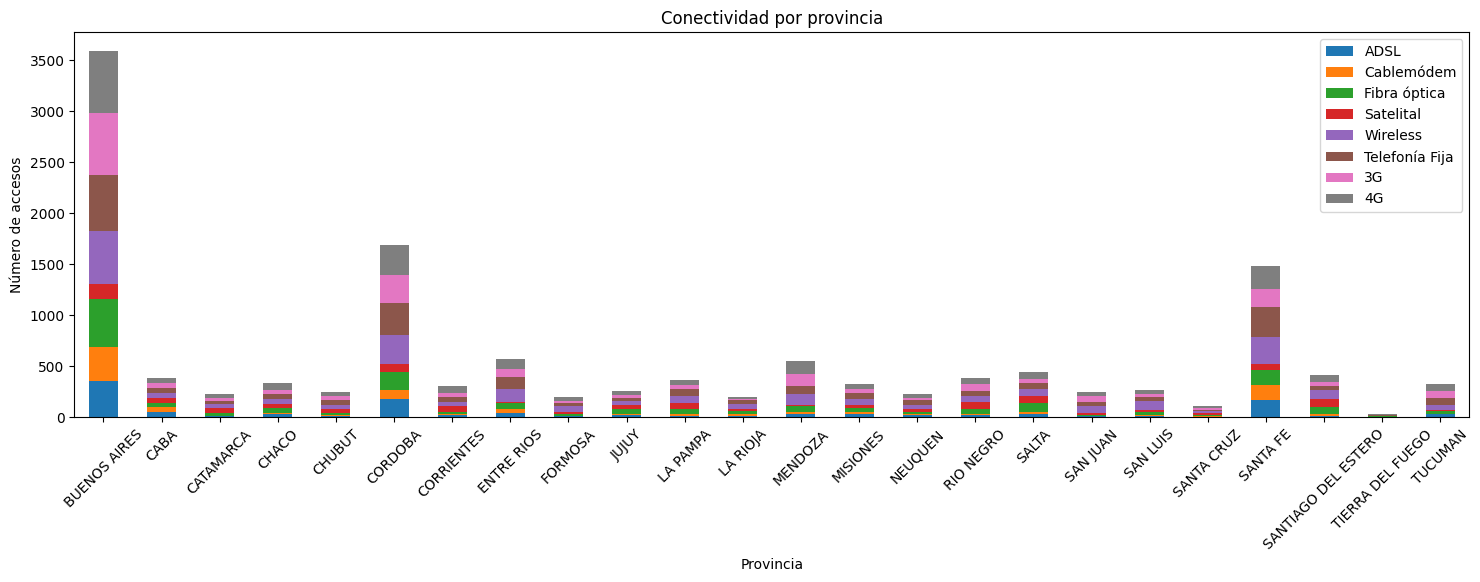

In [13]:
# Agrupamos por provincia y sumamos las conexiones para cada tecnología
conectividad_por_provincia = Mapa_de_Conectividad_df.groupby('Provincia')[tecnologias].sum()

# Visualizamos la conectividad por provincia
conectividad_por_provincia.plot(kind='bar', stacked=True, figsize=(18, 5))
plt.title('Conectividad por provincia')
plt.ylabel('Número de accesos')
plt.xticks(rotation=45)  # Inclinar los rótulos del eje x a 45 grados
plt.show()


El gráfico de **Conectividad por provincia** destaca a **Buenos Aires** y **Santa Fe** como las provincias con mayor cantidad de accesos a tecnologías de conectividad. Buenos Aires, en particular, sobresale por su infraestructura avanzada, lo que refleja su importancia como centro económico y urbano. Santa Fe también muestra una infraestructura considerable, aunque en menor escala.

Las **tecnologías móviles (4G y 3G)** predominan en casi todas las provincias, lo que demuestra el avance de las redes móviles en Argentina. Sin embargo, algunas provincias, como Tucumán y Santiago del Estero, tienen menos accesos a tecnologías móviles avanzadas, lo que sugiere una brecha digital entre las regiones más desarrolladas y las menos desarrolladas.

La **fibra óptica**, una de las tecnologías más avanzadas, tiene una presencia significativa solo en provincias como Buenos Aires, Córdoba y Santa Fe, mientras que en otras regiones su penetración es limitada. Esto refleja una desigualdad en el acceso a tecnologías avanzadas, con provincias más pequeñas y remotas dependiendo de soluciones menos modernas.

Aunque la **telefonía fija** y las tecnologías wireless siguen siendo relevantes, especialmente en las provincias más pequeñas, su importancia está disminuyendo a medida que las redes móviles y de fibra óptica se expanden. El gráfico muestra claramente que la infraestructura de conectividad en Argentina varía considerablemente entre las provincias, con algunas regiones mucho más avanzadas que otras.

**Tierra del Fuego** enfrenta limitaciones en cuanto a la infraestructura de conectividad, con menos opciones de acceso a tecnologías avanzadas como fibra óptica y una dependencia relativamente mayor en las tecnologías móviles. La geografía de la provincia, al estar en el extremo sur del país y ser más remota, probablemente influye en esta menor cobertura tecnológica.